In [1]:
from IPython.display import display, Math, Latex
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

__1. Consider two population of N neurons $f_j(x) + \eta_j$ with j = 1,...,N and i.i.d. Gaussian noise $\eta_j \sim \mathcal{N}(0,\sigma^2)$ with diﬀerent tuning curves in both populations. <br>
Population (A):
$$
f_j(s) = f_{max} \cdot s
$$
Population (B):
$$
f_j(s) = 
 \begin{cases}
      Nf_{max} \big( s-\frac{j-1}{N} \big) &, \frac{j-1}{N}<s<\frac{j}{N} \\
      0 &, \text{else}
 \end{cases}
$$
Consider the stimulus interval to be $s \in (0,1)$<br>
Hint: We are considering the whole population code, so we have the population response deﬁned as $(r|s)$. However in the case A. the responses of individual neurons are independent, so $P(r|s) = \prod_{k=1}^{N}P(r_k|s)$ Another useful thing to remember: logarithm (needed for Fisher information) transforms multiplication into sum.__


__(a) Set $N = 10$ and $f_{max} = 20$. Plot the tuning function of neuron number 5 for codes A and B.__

In [2]:
N=10
f_max = 20
j=5
def population_A(s,f_max):
# s: a 1D vector of stimulus
# f_max=10
# return r: response of population A to the stimulus
    r = f_max * s
    return r

def population_B(s,f_max,N,j):
# s: a 1D vector of stimulus
# f_max=10, N=10, j=5
# return r: response of population B to the stimulus
    r = np.zeros(len(s))
    idx=(s > (j-1)/N) & (s < j/N)
    r[idx] = N*f_max*(s[idx]-(j-1)/N)
    
    return r
    

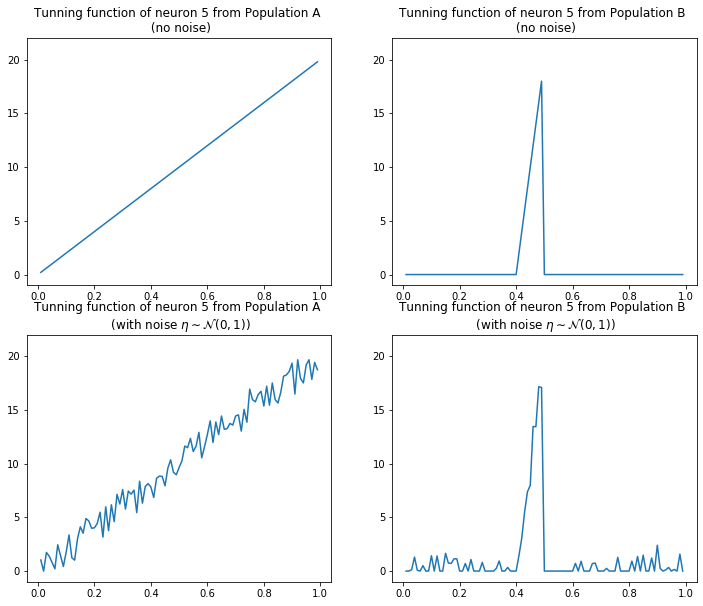

In [3]:
s = np.arange(1/100, 1, 1/100)
rA = population_A(s,f_max)
rB = population_B(s,f_max,N,j)

# add some noise
sigma = 1
rA_noise = rA + np.random.normal(0,sigma,len(s))
rA_noise[rA_noise<0]=0
rB_noise = rB + np.random.normal(0,sigma,len(s))
rB_noise[rB_noise<0]=0

# plot
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(s,rA)
plt.ylim([-1,22])
plt.title('Tunning function of neuron 5 from Population A \n (no noise)')
plt.subplot(2,2,2)
plt.plot(s,rB)
plt.ylim([-1,22])
plt.title('Tunning function of neuron 5 from Population B \n (no noise)')
plt.subplot(2,2,3)
plt.plot(s,rA_noise)
plt.ylim([-1,22])
plt.title('Tunning function of neuron 5 from Population A \n (with noise $\eta \sim \mathcal{N}(0,1)$)')
plt.subplot(2,2,4)
plt.plot(s,rB_noise)
plt.ylim([-1,22])
plt.title('Tunning function of neuron 5 from Population B \n (with noise $\eta \sim \mathcal{N}(0,1)$)')
plt.show()

__(b) Plot the Fisher Information $J_s$ for both populations for the settings in (a).__

$
\text{For single neuron:}
$

$
\begin{align*}
J(s) = -\mathbb{E} \big[\big( \frac{\partial^2}{\partial^2 s} \, \ln P(r_k|s) \big) \, \big| \, s\big]
\quad\quad ,(r_k|s) \sim \mathcal{N}(f_k(s),\sigma^2)
\end{align*}
$

$
\\
\text{For neuron in population A:}
$

$
\begin{align*}
\ln P(r_k|s) &= \ln \frac{1}{\sqrt{2\pi} \, \sigma} \, e^{-\frac{(r_k-f_k(s))^2}{2\sigma^2}}
\quad\quad,f_k(s)=f_{max}\,s\\
&= \ln \frac{1}{\sqrt{2\pi} \, \sigma} \, -\frac{(r_k-f_{max}\,s)^2}{2\sigma^2}
\end{align*}
$

$
\begin{align*}
&\frac{\partial}{\partial s} \ln P(r_k|s) = -\frac{2(r_k-f_{max}\,s)(-f_{max})}{2\sigma^2}\\
&\frac{\partial^2}{\partial^2 s} \ln P(r_k|s) = -\frac{f_{max}^2}{\sigma^2}\\
&J(s) = -\mathbb{E} \big[-\frac{f_{max}^2}{\sigma^2} \, \big| \, s\big] = \frac{f_{max}^2}{\sigma^2}
\end{align*}
$

$
\\
\text{For neuron in population B:}
$

$
\begin{align*}
\ln P(r_k|s) &= \ln \frac{1}{\sqrt{2\pi} \, \sigma} \, e^{-\frac{(r_k-f_k(s))^2}{2\sigma^2}}
\quad\quad,
f_k(s)=
    \begin{cases}
        Nf_{max} \big( s-\frac{j-1}{N} \big) &, \frac{j-1}{N}<s<\frac{j}{N} \\
        0 &, \text{else}
    \end{cases}\\
&= 
    \begin{cases}
        \ln \frac{1}{\sqrt{2\pi} \, \sigma} \, -\frac{\big(r_k-Nf_{max} ( s-\frac{j-1}{N})\big)^2}{2\sigma^2} 
            &, \frac{j-1}{N}<s<\frac{j}{N} \\
        \ln \frac{1}{\sqrt{2\pi} \, \sigma} \, -\frac{\big(r_k-0\big)^2}{2\sigma^2}
            &, \text{else}
    \end{cases}\\
\end{align*}
$

$
\begin{align*}
&\frac{\partial}{\partial s} \ln P(r_k|s) = 
    \begin{cases}
        -\frac{2\big(r_k-Nf_{max} ( s-\frac{j-1}{N})\big)(-Nf_{max})}{2\sigma^2} 
            &, \frac{j-1}{N}<s<\frac{j}{N} \\
        0   &, \text{else}
    \end{cases}\\
&\frac{\partial^2}{\partial^2 s} \ln P(r_k|s) =
    \begin{cases}
        -\frac{N^2f_{max}^2)}{\sigma^2} 
            &, \frac{j-1}{N}<s<\frac{j}{N} \\
        0   &, \text{else}
    \end{cases}\\
&J(s) = -\mathbb{E} \big[\big( \frac{\partial^2}{\partial^2 s} \, \ln P(r_k|s) \big) \, \big| \, s\big] =
    \begin{cases}
        \frac{N^2f_{max}^2}{\sigma^2} 
            &, \frac{j-1}{N}<s<\frac{j}{N} \\
        0   &, \text{else}
    \end{cases}\\
\end{align*}
$

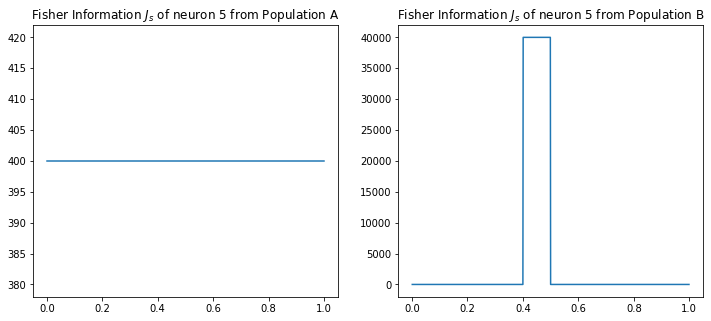

In [4]:
def FI_neuron_In_A(f_max,sigma,s):
    FI = f_max**2/sigma**2 * np.ones(len(s))
    return FI

def FI_neuron_In_B(f_max,sigma,s,j,N):
    FI = np.zeros(len(s))
    cond1 = s>(j-1)/N
    cond2 = s<j/N
    idx = cond1 & cond2
    FI[idx] = N**2 * f_max**2 / sigma**2
    return FI

N=10
f_max = 20
j=5
s = np.arange(1/1000, 1, 1/1000)
sigma=1

FI_A5 = FI_neuron_In_A(f_max,sigma,s)
FI_B5 = FI_neuron_In_B(f_max,sigma,s,j,N)

# plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(s,FI_A5)
plt.title(r'Fisher Information $J_s$ of neuron 5 from Population A')
plt.subplot(1,2,2)
plt.plot(s,FI_B5)
plt.title(r'Fisher Information $J_s$ of neuron 5 from Population B')
plt.show()

__(c) Compute the Fisher Information $J_s$ for both codes (in the general case not restricted to speciﬁc parameter settings). Which code is better and why?__

$
\text{For the whole population:}
$

$
\begin{align*}
J(s) &= -\mathbb{E} \big[\big( \frac{\partial^2}{\partial^2 s} \, \ln P(r|s) \big) \, \big| \, s\big]\\
&= -\mathbb{E} \big[\big( \frac{\partial^2}{\partial^2 s} \, \ln \prod_{k=1}^{N}P(r_k|s) \big) \, \big| \, s\big]\\
&= -\mathbb{E} \big[\big( \frac{\partial^2}{\partial^2 s} \, \sum_{k=1}^{N} \ln P(r_k|s) \big) \, \big| \, s\big]\\
&= -\mathbb{E} \big[\big( \sum_{k=1}^{N} \frac{\partial^2}{\partial^2 s} \,  \ln P(r_k|s) \big) \, \big| \, s\big]\\
&= -\sum_{k=1}^{N} \mathbb{E} \big[\big(\frac{\partial^2}{\partial^2 s} \,  \ln P(r_k|s) \big) \, \big| \, s\big]
\end{align*}
$

$
\therefore \text{Fisher Information is additive under our settings:}
$

$
\begin{align*}
\therefore &\text{For population A:}\\
&J(s) = N\frac{f_{max}^2}{\sigma^2}\\
&\text{For population B:}\\
&J(s) = 
    \begin{cases}
        \frac{N^2f_{max}^2}{\sigma^2} 
            &, s \in (0,\frac{1}{N}) \cup (\frac{1}{N},\frac{2}{N}) \cup \cdots \cup (\frac{N-1}{N},1)\\
        0   &, \text{else}
    \end{cases}\\
\end{align*}
$

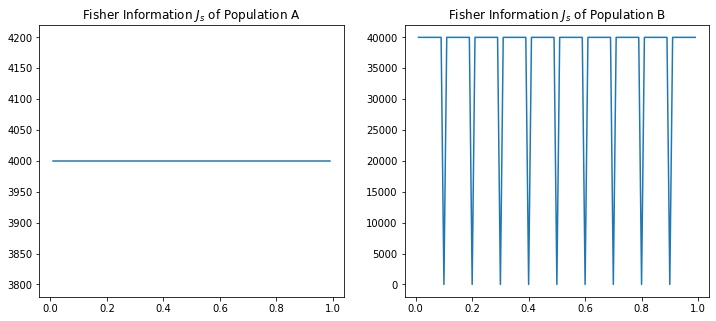

In [5]:
s = np.array([x/100 for x in range(1, 100)])
FI_A = np.zeros(len(s))
FI_B = np.zeros(len(s))
for i in range(N):
    temp = FI_neuron_In_A(f_max,sigma,s)
    FI_A += temp
    temp = FI_neuron_In_B(f_max,sigma,s,i+1,N)
    FI_B += temp

# plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(s,FI_A)
plt.title(r'Fisher Information $J_s$ of Population A')
plt.subplot(1,2,2)
plt.plot(s,FI_B)
plt.title(r'Fisher Information $J_s$ of Population B')
plt.show()

Fisher information of Population B have some 0 points due to the function definition ( no equal signs in $\frac{j-1}{N}<s<\frac{j}{N}$). <br>
In population A, all neurons responds to the simulus in the same way, by increasing the firing rate as $s$ gets larger.Having more neurons in population A leads to a higher output intensity. In population B, different neurons are tunned to different sitimulus range, so more neurons in population B means a higher resolution of the stimulus, and because of the $N$ in the tunning function, it will also leads to a higher output intensity.<br>
So the codes for population B is better.


__2. Lets repeat the pseudo-experiment described in the lecture to illustrate on the inﬂuence of noise correlations on encoding of stimuli. Decide on the tuning for two neurons and two stimuli (set the values of tuning functions) and the on the noise correlations. Generate and plot 1000 responses of the two-neurons population to the repetitive presentation of the stimuli. Find values of the tuning function and noise correlations such that noise will be <br>
(a) bad for encoding <br>
(b) good for encoding <br>
It is enough to justify “good” and “bad” by the illustration (use shuﬄe and plot the shuﬄed responses).__

In [6]:
def shuffler (v):
# input: v, 2D vector of points, shape (N,2)
# output: coordinate of shuffled point
    c = v.copy()
    N = v.shape[0]
    idx = np.random.permutation(N)
    c[:,0] = c[idx,0]
    idx = np.random.permutation(N)
    c[:,1] = c[idx,1]
    return c

def plot_func(r1,r2,mean1,mean2):
    plt.scatter(r1[:,0],r1[:,1], s=3, alpha = 0.8, label='response from neuron 1') 
    plt.scatter(r2[:,0],r2[:,1], s=3, alpha = 0.8, label='response from neuron 2') 
    plt.scatter(mean1[0], mean1[1], s = 30, c = 'k', marker = 's')
    plt.scatter(mean2[0], mean2[1], s = 30, c = 'k', marker = 's')
    plt.xlabel('neuron 1 (spike rates)')
    plt.ylabel('neuron 2 (spike rates)')
    plt.xlim([0,15])
    plt.ylim([0,15])
    plt.legend()

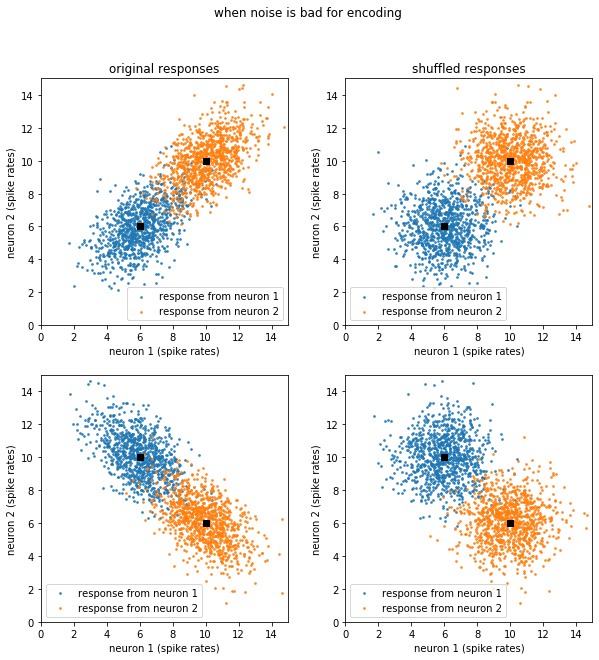

In [7]:
mean1 = [6,6]
mean2 = [10,10]
cov1 = [[2,1],[1,2]]
cov2 = cov1
N = 1000 
r1=np.random.multivariate_normal(mean1, cov1,N)
r2=np.random.multivariate_normal(mean2, cov2,N)
s1=shuffler(r1)
s2=shuffler(r2)

mean3 = [6,10]
mean4 = [10,6]
cov3 = [[2,-1],[-1,2]]
cov4 = cov3
r3=np.random.multivariate_normal(mean3, cov3,N)
r4=np.random.multivariate_normal(mean4, cov4,N)
s3=shuffler(r3)
s4=shuffler(r4)

plt.figure(figsize=(10,10))
plt.suptitle('when noise is bad for encoding')
plt.subplot(2,2,1,aspect='equal')
plot_func(r1,r2,mean1,mean2)
plt.title('original responses')
plt.subplot(2,2,2,aspect='equal')
plot_func(s1,s2,mean1,mean2)
plt.title('shuffled responses')
plt.subplot(2,2,3,aspect='equal')
plot_func(r3,r4,mean3,mean4)
plt.subplot(2,2,4,aspect='equal')
plot_func(s3,s4,mean3,mean4)

The unshuffled responses tend to have larger overlap than the shuffled response(noise correlation destroyed), then noise is bad for encoding.

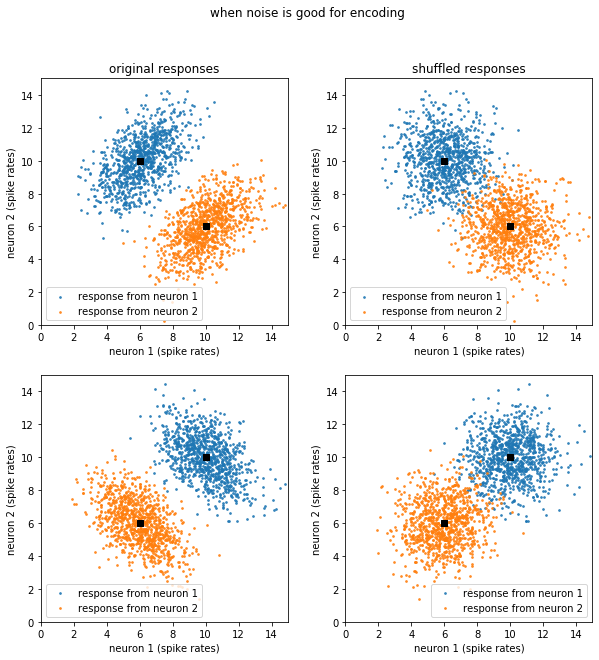

In [8]:
mean1 = [6,10]
mean2 = [10,6]
cov1 = [[2,1],[1,2]]
cov2 = cov1
N = 1000 
r1=np.random.multivariate_normal(mean1, cov1,N)
r2=np.random.multivariate_normal(mean2, cov2,N)
s1=shuffler(r1)
s2=shuffler(r2)

mean3 = [10,10]
mean4 = [6,6]
cov3 = [[2,-1],[-1,2]]
cov4 = cov3
r3=np.random.multivariate_normal(mean3, cov3,N)
r4=np.random.multivariate_normal(mean4, cov4,N)
s3=shuffler(r3)
s4=shuffler(r4)

plt.figure(figsize=(10,10))
plt.suptitle('when noise is good for encoding')
plt.subplot(2,2,1,aspect='equal')
plot_func(r1,r2,mean1,mean2)
plt.title('original responses')
plt.subplot(2,2,2,aspect='equal')
plot_func(s1,s2,mean1,mean2)
plt.title('shuffled responses')
plt.subplot(2,2,3,aspect='equal')
plot_func(r3,r4,mean3,mean4)
plt.subplot(2,2,4,aspect='equal')
plot_func(s3,s4,mean3,mean4)

The unshuffled responses tend to have smaller overlap than the shuffled response(noise correlation destroyed), then noise is good for encoding.

__3. Let $X = (X_1,...,X_N)$ be a vector of random variables, e.g. the spike counts of neurons in a given time window.<br>
(a) Show that 
$$
Var\Big[ \sum_{i} X_i \Big] = \sum_{i} Var[X_i]+\sum_{i}\sum_{j \neq i} Cov[X_i,X_j]
$$__


$
\begin{align*}
Var[X] = \mathbb{E} \Big[ \big( X - \mu_X \big)^2 \Big]
= \mathbb{E}[X^2] - \big( \mathbb{E}[X] \big)^2
\end{align*}
$

$
\begin{align*}
Cov[X,Y] = \mathbb{E} \Big[ \big (X - \mu_X)(Y - \mu_Y) \Big]
= \mathbb{E}[XY] - \mathbb{E}[X] \mathbb{E}[Y]
\end{align*}
$

$
\begin{align*}
\therefore Var\Big[ \sum_{i} X_i \Big] = \mathbb{E} \Big[ \big( \sum_i X_i \big)^2 \Big]
- \mathbb{E}^2\Big[ \sum_i X_i \Big]
\end{align*}
$

$
\begin{align*}
&\mathbb{E} \Big[ \big( \sum_i X_i \big)^2 \Big] = \mathbb{E}\Big[ \big( \sum_i X_i \big) \big( \sum_i X_i \big) \Big]
=\mathbb{E}\Big[ \sum_{i=1}^N \sum_{j=1}^N X_i X_j \Big] = \sum_{i=1}^N \sum_{j=1}^N \mathbb{E}\Big[ X_i X_j \Big]\\
&\mathbb{E}^2\Big[ \sum_i X_i \Big] = \big( \sum_i \mathbb{E}[X_i] \big)\big( \sum_i \mathbb{E}[X_i] \big)
=\sum_{i=1}^N \sum_{j=1}^N \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_j \Big]
\end{align*}
$

$
\begin{align*}
\therefore Var\Big[ \sum_{i} X_i \Big] &= \sum_{i=1}^N \sum_{j=1}^N \mathbb{E}\Big[ X_i X_j \Big] 
-\sum_{i=1}^N \sum_{j=1}^N \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_j \Big]\\
&= \Big(\sum_{i=1}^N \mathbb{E}\Big[ X_i X_i \Big] 
-\sum_{i=1}^N \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_i \Big] \Big)
+ \Big( \sum_{i=1}^N \sum_{j \neq i} \mathbb{E}\Big[ X_i X_j \Big] 
-\sum_{i=1}^N \sum_{j\neq i} \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_j \Big] \Big)\\
&= \sum_{i=1}^N \Big(\mathbb{E}\Big[ X_i X_i \Big] 
- \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_i \Big] \Big)
+ \sum_{i=1}^N \sum_{j \neq i} \Big( \mathbb{E}\Big[ X_i X_j \Big] 
- \mathbb{E}\Big[ X_i \Big] \mathbb{E}\Big[ X_j \Big] \Big)\\
&= \sum_{i} Var[X_i]+\sum_{i}\sum_{j \neq i} Cov[X_i,X_j]
\end{align*}
$

__(b) Assume that $X_i$ have identical variances $\sigma^2$ and all pairs $X_i, X_j$ have identical correlations $\rho$. Show that
$$
Var\Big[ \frac{1}{N} \sum_i X_i \Big] = \frac{\sigma^2}{N}(1+\rho(N-1))
$$
Which proves equation from the lecture.__

$
\begin{align*}
Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}
\end{align*}
$

$
\begin{align*}
Var\Big[ \frac{1}{N} \sum_i X_i \Big] &= \frac{1}{N^2} Var\Big[ \sum_i X_i \Big]\\
&=\frac{1}{N^2} \Big( \sum_{i} Var[X_i]+\sum_{i}\sum_{j \neq i} Cov[X_i,X_j] \Big)\\
&=\frac{1}{N^2} \Big( \sum_{i} \sigma^2 +\sum_{i}\sum_{j \neq i} \rho \sigma^2 \Big)\\
&=\frac{1}{N^2} \Big( N \sigma^2 +N(N-1) \rho \sigma^2 \Big)\\
&=\frac{\sigma^2}{N} \Big(1 +(N-1) \rho\Big)
\end{align*}
$

__(c) Show that for even N
$$
Var \Big[ \frac{1}{N} \sum_{i=1}^{N} (-1)^i X_i \Big] = \frac{\sigma^2}{N} (1-\rho)
$$__ 

$
\begin{align*}
Var \Big[ \frac{1}{N} \sum_{i=1}^{N} (-1)^i X_i \Big] &= \frac{1}{N^2} Var \Big[\sum_{i=1}^{N} (-1)^i X_i \Big]\\
&= \frac{1}{N^2} Var \Big[-X_1+X_2-X_3+X_4+ \cdots -X_{N-1}+X_N\Big]\\
&= \frac{1}{N^2} Var \Big[\sum_{i=1}^{\frac{N}{2}} X_{2i} - \sum_{i=1}^{\frac{N}{2}} X_{2i-1} \Big] 
\quad,\text{(N even)}
\end{align*}
$

$
\begin{align*}
&\text{Let } A= \sum_{i=1}^{\frac{N}{2}} X_{2i},\, B = \sum_{i=1}^{\frac{N}{2}} X_{2i-1}\\
& Var(A-B) = Var(A)+Var(B)-2Cov(A,B)
\end{align*}
$

$
\begin{align*}
&Var(A) = Var(\sum_{i=1}^{\frac{N}{2}} X_{2i}) 
= \sum_{i=1}^{\frac{N}{2}} Var[X_{2i}] + \sum_{i=1}^{\frac{N}{2}}\sum_{j \neq i} Cov[X_{2i},X_{2j}]
= \frac{N}{2}\sigma^2 + \frac{N}{2}(\frac{N}{2}-1)\rho\sigma^2\\
&Var(B) = Var(\sum_{i=1}^{\frac{N}{2}} X_{2i-1}) 
= \sum_{i=1}^{\frac{N}{2}} Var[X_{2i-1}] + \sum_{i=1}^{\frac{N}{2}}\sum_{j \neq i} Cov[X_{2i-1},X_{2j-1}]
= \frac{N}{2}\sigma^2 + \frac{N}{2}(\frac{N}{2}-1)\rho\sigma^2\\
&Cov(A,B) = Cov(\sum_{i=1}^{\frac{N}{2}} X_{2i},\sum_{i=1}^{\frac{N}{2}} X_{2i-1})
= \sum_{i=1}^{\frac{N}{2}}\sum_{j=1}^{\frac{N}{2}}Cov(X_{2i},X_{2j-1}) = \frac{N}{2}\frac{N}{2}\rho\sigma^2
\end{align*}
$

$
\begin{align*}
\therefore Var \Big[ \frac{1}{N} \sum_{i=1}^{N} (-1)^i X_i \Big] 
= \frac{1}{N^2}(N\sigma^2 + N(\frac{N}{2}-1)\rho\sigma^2 - N\frac{N}{2}\rho\sigma^2)
= \frac{1}{N^2}(N\sigma^2 - N\rho\sigma^2) =\frac{\sigma^2}{N} (1-\rho)
\end{align*}
$